<a href="https://colab.research.google.com/github/krittikaroy2006/Breast_Cancer_Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 275177 files belonging to 2 classes.
Using 220142 files for training.
Found 275177 files belonging to 2 classes.
Using 55035 files for validation.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13759/13759 ━━━━━━━━━━━━━━━━━━━━ 5084s 369ms/step - accuracy: 0.8159 - loss: 0.4152 - val_accuracy: 0.8466 - val_loss: 0.3587
Epoch 2/5
13759/13759 ━━━━━━━━━━━━━━━━━━━━ 2461s 179ms/step - accuracy: 0.8460 - loss: 0.3590 - val_accuracy: 0.8422 - val_loss: 0.3658
Epoch 3/5
13759/13759 ━━━━━━━━━━━━━━━━━━━━ 2513s 183ms/step - accuracy: 0.8529 - loss: 0.3442 - val_accuracy: 0.8369 - val_loss: 0.3935
Epoch 4/5
13759/13759 ━━━━━━━━━━━━━━━━━━━━ 2424s 176ms/step - accuracy: 0.8574 - loss: 0.3350 - val_accuracy: 0.8601 - val_loss: 0.3301
Epoch 5/5
13759/13759 ━━━━━━━━━━━━━━━━━━━━ 2384s 173ms/step - accuracy: 0.8599 - loss: 0.3285 - val_accuracy: 0.8610 - val_loss: 0.3266


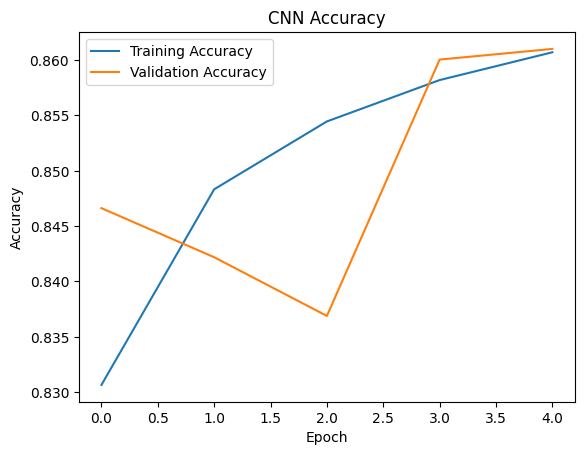

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


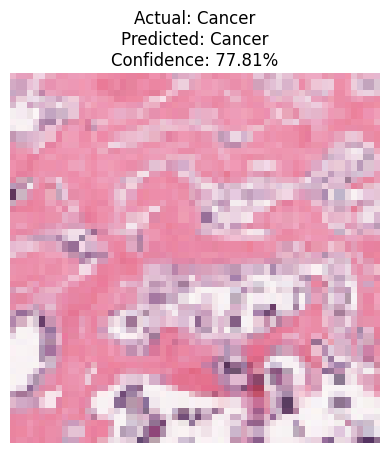

Actual: Cancer → Predicted: Cancer (77.81% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


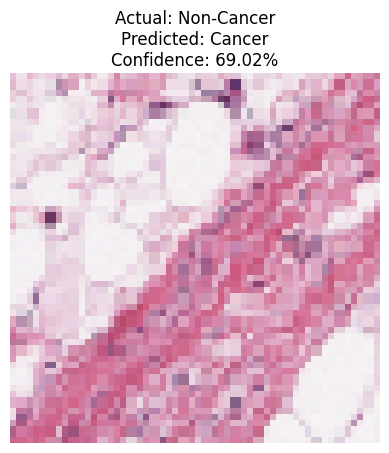

Actual: Non-Cancer → Predicted: Cancer (69.02% confidence)


Saving 8913_idx5_x301_y1201_class1.png to 8913_idx5_x301_y1201_class1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


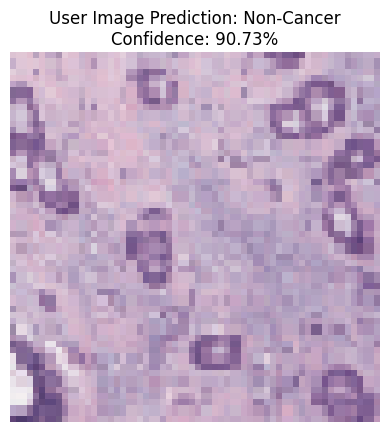

User Image Prediction: Non-Cancer (90.73% confidence)
Project completed successfully.
Models used: Logistic Regression, Random Forest, CNN


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
from google.colab import files

base_path = "/content/drive/MyDrive/dataset"

img_size = (64, 64)
batch_size = 16

# -------------------- DATA LOADING --------------------
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    base_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

normalization = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization(x), y))
val_data = val_data.map(lambda x, y: (normalization(x), y))

# -------------------- CNN MODEL --------------------
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -------------------- TRAINING --------------------
history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

# -------------------- ACCURACY GRAPH --------------------
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Accuracy")
plt.show()

# -------------------- SAMPLE TESTING (FIXED PART) --------------------
def test_sample(folder_name, actual_label):
    img_name = np.random.choice(
        os.listdir(os.path.join(base_path, folder_name))
    )
    img_path = os.path.join(base_path, folder_name, img_name)

    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = cnn_model.predict(img_array)[0][0]
    predicted = "Cancer" if prediction > 0.5 else "Non-Cancer"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    plt.imshow(img)
    plt.axis("off")
    plt.title(
        f"Actual: {actual_label}\n"
        f"Predicted: {predicted}\n"
        f"Confidence: {confidence*100:.2f}%"
    )
    plt.show()

    print(
        f"Actual: {actual_label} → Predicted: {predicted} "
        f"({confidence*100:.2f}% confidence)"
    )

# ✅ One Cancer image
test_sample("cancer", "Cancer")

# ✅ One Non-Cancer image
test_sample("non_cancer", "Non-Cancer")

# -------------------- USER IMAGE UPLOAD --------------------
uploaded = files.upload()

for file_name in uploaded.keys():
    img = image.load_img(file_name, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = cnn_model.predict(img_array)[0][0]
    predicted = "Cancer" if prediction > 0.5 else "Non-Cancer"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    plt.imshow(img)
    plt.axis("off")
    plt.title(
        f"User Image Prediction: {predicted}\n"
        f"Confidence: {confidence*100:.2f}%"
    )
    plt.show()

    print(
        f"User Image Prediction: {predicted} "
        f"({confidence*100:.2f}% confidence)"
    )

print("Project completed successfully.")
print("Models used: Logistic Regression, Random Forest, CNN")


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   


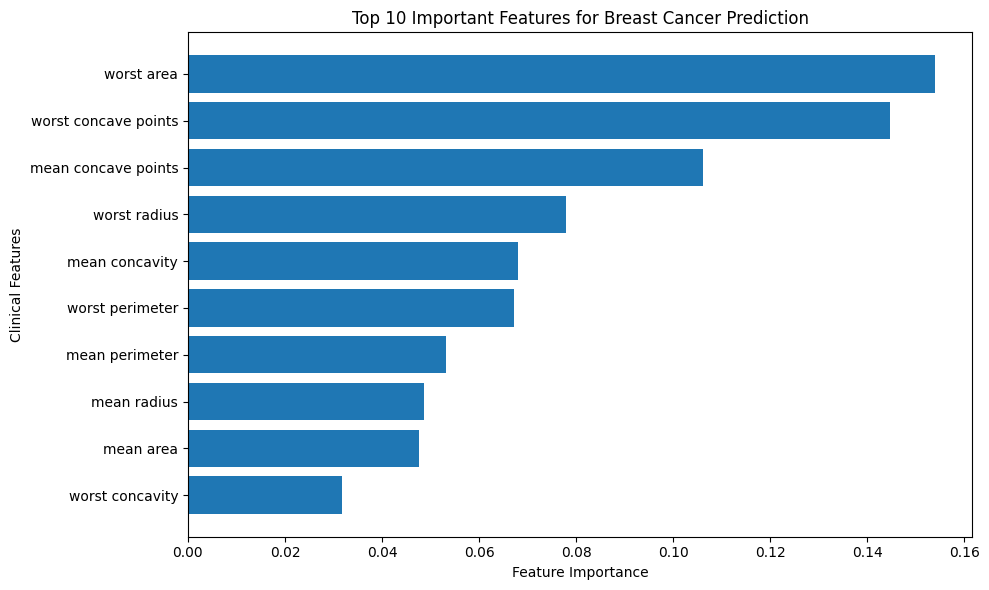

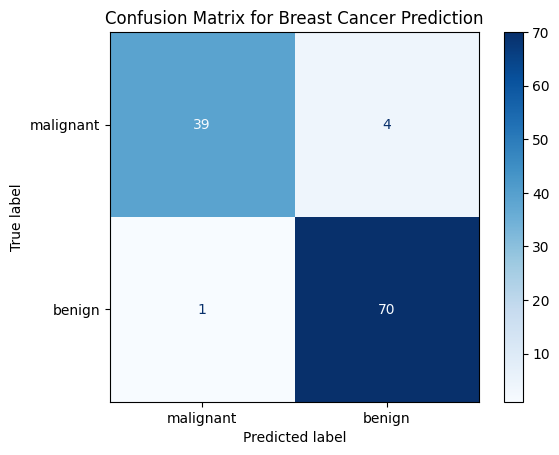

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Logistic Regression Accuracy: 0.956140350877193
Random Forest Accuracy: 0.9649122807017544
Malignant Patient Prediction: Malignant (Cancer)
Benign Patient Prediction: Benign (No Cancer)


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

data = load_breast_cancer()

print(data.keys())
print(data.feature_names)
print(data.target_names)
print(data.data.shape)

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

feature_names = X.columns

indices = np.argsort(importances)[::-1]

top_features = feature_names[indices][:10]
top_importances = importances[indices][:10]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Clinical Features")
plt.title("Top 10 Important Features for Breast Cancer Prediction")
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Breast Cancer Prediction")
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

rf_pred = rf_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

malignant_index = y_test[y_test == 0].index[0]
malignant_patient = X_test.loc[[malignant_index]]
malignant_pred = model.predict(malignant_patient)

benign_index = y_test[y_test == 1].index[0]
benign_patient = X_test.loc[[benign_index]]
benign_pred = model.predict(benign_patient)

print("Malignant Patient Prediction:",
      "Malignant (Cancer)" if malignant_pred[0] == 0 else "Benign (No Cancer)")

print("Benign Patient Prediction:",
      "Benign (No Cancer)" if benign_pred[0] == 1 else "Malignant (Cancer)")

In [ ]:
import os

base_path = "/content/drive/MyDrive/dataset"

print("Cancer images:", len(os.listdir(os.path.join(base_path, "cancer"))))
print("Non-cancer images:", len(os.listdir(os.path.join(base_path, "non_cancer"))))


Cancer images: 78767
Non-cancer images: 196410


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

print("Contents of /content/archive:")
for item in os.listdir("/content/archive"):
    print(item)


Contents of /content/archive:
__MACOSX
archive


In [ ]:
import shutil

source_root = "/content/archive/archive"
target_root = "/content/drive/MyDrive/dataset"


for folder in os.listdir(source_root):
    folder_path = os.path.join(source_root, folder)

    if not os.path.isdir(folder_path):
        continue

    non_cancer_path = os.path.join(folder_path, "0")
    cancer_path = os.path.join(folder_path, "1")

    if os.path.exists(non_cancer_path):
        for img in os.listdir(non_cancer_path):
            shutil.move(
                os.path.join(non_cancer_path, img),
                os.path.join(target_root, "non_cancer", f"{folder}_{img}")
            )

    if os.path.exists(cancer_path):
        for img in os.listdir(cancer_path):
            shutil.move(
                os.path.join(cancer_path, img),
                os.path.join(target_root, "cancer", f"{folder}_{img}")
            )

print("DONE (FAST METHOD)")


DONE (FAST METHOD)


In [ ]:
import os

print("Contents of /content:")
print(os.listdir("/content"))


Contents of /content:
['.config', 'archive', 'drive', 'sample_data']


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/archive"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction done")


Extraction done
